# Path Planning for Autonomous Vehicle - Dijkstra Algorithm

Import library package

In [1]:
import networkx as n


Graphical Representation 

In [2]:
G_symmetric = n.Graph()
G_symmetric.add_edge('X', 'A', weight=7)
G_symmetric.add_edge('X', 'B', weight=2)
G_symmetric.add_edge('X', 'C', weight=3)
G_symmetric.add_edge('X', 'E', weight=4)
G_symmetric.add_edge('A', 'B', weight=3)
G_symmetric.add_edge('A', 'D', weight=4)
G_symmetric.add_edge('B', 'D', weight=4)
G_symmetric.add_edge('B', 'H', weight=5)
G_symmetric.add_edge('C', 'L', weight=2)
G_symmetric.add_edge('D', 'F', weight=1)
G_symmetric.add_edge('F', 'H', weight=3)
G_symmetric.add_edge('G', 'H', weight=2)
G_symmetric.add_edge('G', 'Y', weight=2)
G_symmetric.add_edge('I', 'J', weight=6)
G_symmetric.add_edge('I', 'K', weight=4)
G_symmetric.add_edge('I', 'L', weight=4)
G_symmetric.add_edge('J', 'L', weight=1)
G_symmetric.add_edge('K', 'Y', weight=5)

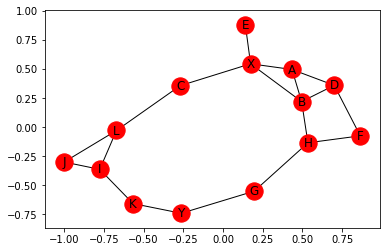

In [4]:
n.draw_networkx(G_symmetric)

In [5]:
from collections import defaultdict

Creating a weighted graph 

In [6]:
class Graphnetwork():
    def __init__(self):
        
        self.edges = defaultdict(list)
        self.weights = {}

    
    def add_edges(self, source, destination, cost):
        
        self.edges[source].append(destination)
        self.edges[destination].append(source)
        self.weights[(source, destination)] = cost
        self.weights[(destination, source)] = cost


In [7]:
graph = Graphnetwork()

In [8]:
edges = [
    ('X', 'A', 7),
    ('X', 'B', 2),
    ('X', 'C', 3),
    ('X', 'E', 4),
    ('A', 'B', 3),
    ('A', 'D', 4),
    ('B', 'D', 4),
    ('B', 'H', 5),
    ('C', 'L', 2),
    ('D', 'F', 1),
    ('F', 'H', 3),
    ('G', 'H', 2),
    ('G', 'Y', 2),
    ('I', 'J', 6),
    ('I', 'K', 4),
    ('I', 'L', 4),
    ('J', 'L', 1),
    ('K', 'Y', 5),
]

for edge in edges:
    graph.add_edges(*edge)

Function for Dijkstra Algorithm

In [9]:
def Dijkstra(graph, start, end):

    shortest_path = {start: (None, 0)}
    current_node = start
    visited = set()
    
    while current_node != end:
        visited.add(current_node)
        destinations = graph.edges[current_node]
        weight_current_node = shortest_path[current_node][1]
        

        for next_node in destinations:
            weight = graph.weights[(current_node, next_node)] + weight_current_node
            
            if next_node not in shortest_path:
                shortest_path[next_node] = (current_node, weight)
                
            else:
                current_shortest_weight = shortest_path[next_node][1]
                
               
                if current_shortest_weight > weight:
                    shortest_path[next_node] = (current_node, weight)
                    
        
        next_destination = {node: shortest_path[node] for node in shortest_path if node not in visited}
        
        if not next_destination:
            return "Route Not Possible"
        # next node is the destination with the lowest weight
        current_node = min(next_destination, key=lambda k: next_destination[k][1])
        
    
    # Work back through destinations in shortest path
    path = []
    while current_node is not None:
        path.append(current_node)
        next_node = shortest_path[current_node][0]
        current_node = next_node
   
    # Reverse path
    path = path[::-1]
    return path

In [10]:
src = str(input ('Enter source node: '))
des = str(input ('Enter destination node: '))


Enter source node: G
Enter destination node: Y


In [11]:
Dijkstra(graph, src, des)

['G', 'Y']

In [12]:
print ('No. of Edges:', G_symmetric.number_of_edges())
print ('No. of Nodes:', G_symmetric.number_of_nodes())

No. of Edges: 18
No. of Nodes: 14


Finding the shortest distance of cost:

In [13]:
from collections import defaultdict
from heapq import *

def dijshp(edges, f, t):
    g = defaultdict(list)
    for l,r,c in edges:
        
        g[l].append((c, r))
        g[r].append((c, l))
    q, seen, mins = [(0,f,())], set(), {f: 0}
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == t: return (cost, path)

            for c, v2 in g.get(v1, ()):
                if v2 in seen: continue
                prev = mins.get(v2, None)
                next = cost + c
                if prev is None or next < prev:
                    mins[v2] = next
                    heappush(q, (next, v2, path))

    return float("inf")


In [14]:
if __name__ == "__main__":
    edges = [
        ('X', 'A', 7),
        ('X', 'B', 2),
        ('X', 'C', 3),
        ('X', 'E', 4),
        ('A', 'B', 3),
        ('A', 'D', 4),
        ('B', 'D', 4),
        ('B', 'H', 5),
        ('C', 'L', 2),
        ('D', 'F', 1),
        ('F', 'H', 3),
        ('G', 'H', 2),
        ('G', 'Y', 2),
        ('I', 'J', 6),
        ('I', 'K', 4),
        ('I', 'L', 4),
        ('J', 'L', 1),
        ('K', 'Y', 5),
    ]

    print ("Dijkstra - Shortest path distance of cost")
    print (edges)
    print ("source <-> destination:")
    print (src,"<->",des)
    print (dijshp(edges, src, des))


Dijkstra - Shortest path distance of cost
[('X', 'A', 7), ('X', 'B', 2), ('X', 'C', 3), ('X', 'E', 4), ('A', 'B', 3), ('A', 'D', 4), ('B', 'D', 4), ('B', 'H', 5), ('C', 'L', 2), ('D', 'F', 1), ('F', 'H', 3), ('G', 'H', 2), ('G', 'Y', 2), ('I', 'J', 6), ('I', 'K', 4), ('I', 'L', 4), ('J', 'L', 1), ('K', 'Y', 5)]
source <-> destination:
G <-> Y
(2, ('Y', ('G', ())))
